In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import seaborn as sns
%matplotlib inline

In [45]:
train = pd.read_csv('titanic_train.csv')

In [46]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [47]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<AxesSubplot:xlabel='Survived', ylabel='count'>

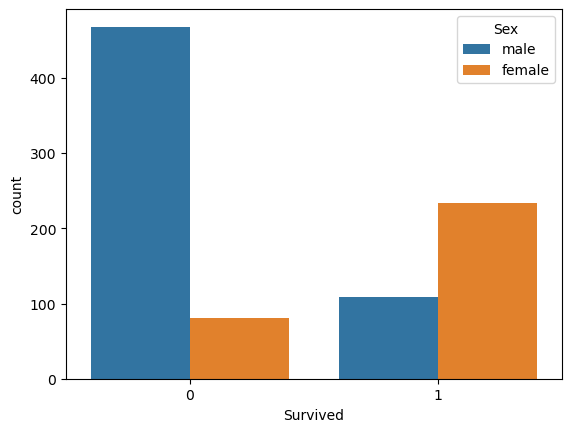

In [48]:
sns.countplot(x = 'Survived', hue = 'Sex', data = train)

<AxesSubplot:xlabel='Survived', ylabel='count'>

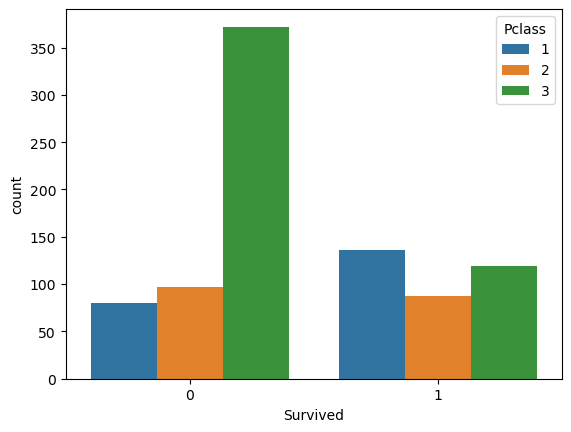

In [49]:
sns.countplot(x = 'Survived', hue = 'Pclass', data = train)

<AxesSubplot:>

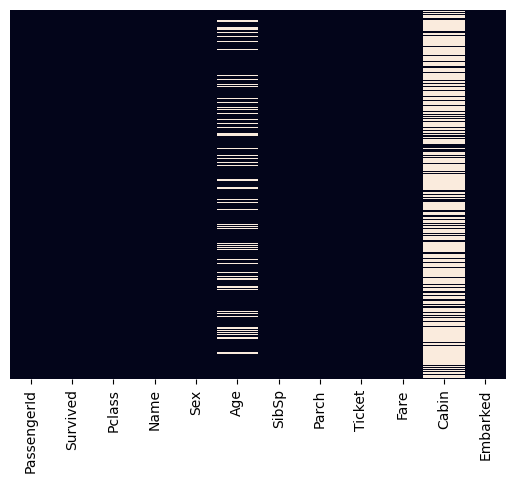

In [50]:
#isnull() gives value as true if there is null value, else false
#yticklabels - Y label
sns.heatmap(train.isnull(), yticklabels = False, cbar = False)

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

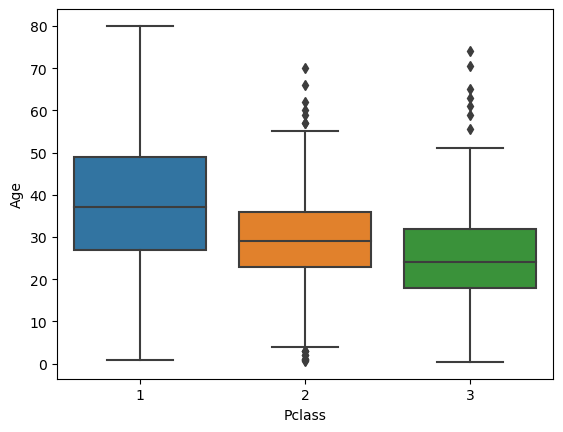

In [51]:
#getting average age of customers in each passenger class using boxplot
sns.boxplot(x='Pclass', y = 'Age', data = train)

In [52]:
#now instead of deleting null values if we want to impute it.
#imputing based on pclass

def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 30
        else:
            return 24
    else:
        return Age
    
        



In [53]:
train['Age']= train[['Age','Pclass']].apply(impute_age, axis =1)


<AxesSubplot:>

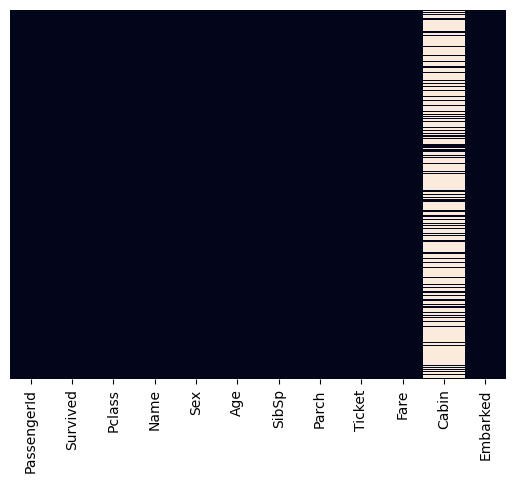

In [54]:
sns.heatmap(train.isnull(), yticklabels = False, cbar = False)

In [55]:
#dropping column 'cabin' as there are too many missing values
train.drop('Cabin', axis = 1, inplace = True)

In [57]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [61]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [71]:
#creating dummy variables : converting categorical variable to 0 or 1.

#sex= pd.get_dummies(train['Sex'])
#its creating 2 columns with female and male.Creates multicollinearity issue.

sex= pd.get_dummies(train['Sex'], drop_first=True)
sex.head()



,male
0,1
1,0
2,0
3,0
4,1


In [75]:
#adding new column
train['sex_recoded']= sex

#OR 

#pd.concat(['train','sex'], axis = 1)

In [76]:
train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,sex_recoded
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1


In [78]:
#dropping duplicate and unnecessary columns

train.drop(['Sex','Name'], axis=1, inplace=True)

KeyError: "['Sex', 'Name'] not found in axis"

In [80]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Ticket,Fare,Embarked,sex_recoded
0,1,0,3,22.0,1,0,A/5 21171,7.2500,S,1
1,2,1,1,38.0,1,0,PC 17599,71.2833,C,0
2,3,1,3,26.0,0,0,STON/O2. 3101282,7.9250,S,0
3,4,1,1,35.0,1,0,113803,53.1000,S,0
4,5,0,3,35.0,0,0,373450,8.0500,S,1
